<a href="https://colab.research.google.com/github/beaamoo/Machine-Learning-Demonstration/blob/main/plot-pca-iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA demonstartion with Iris Data-set

Principal Component Analysis applied to the Iris dataset.

## Visualization

<ipython-input-1-c832ac0bafab>:51: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
<ipython-input-1-c832ac0bafab>:52: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
<ipython-input-1-c832ac0bafab>:53: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


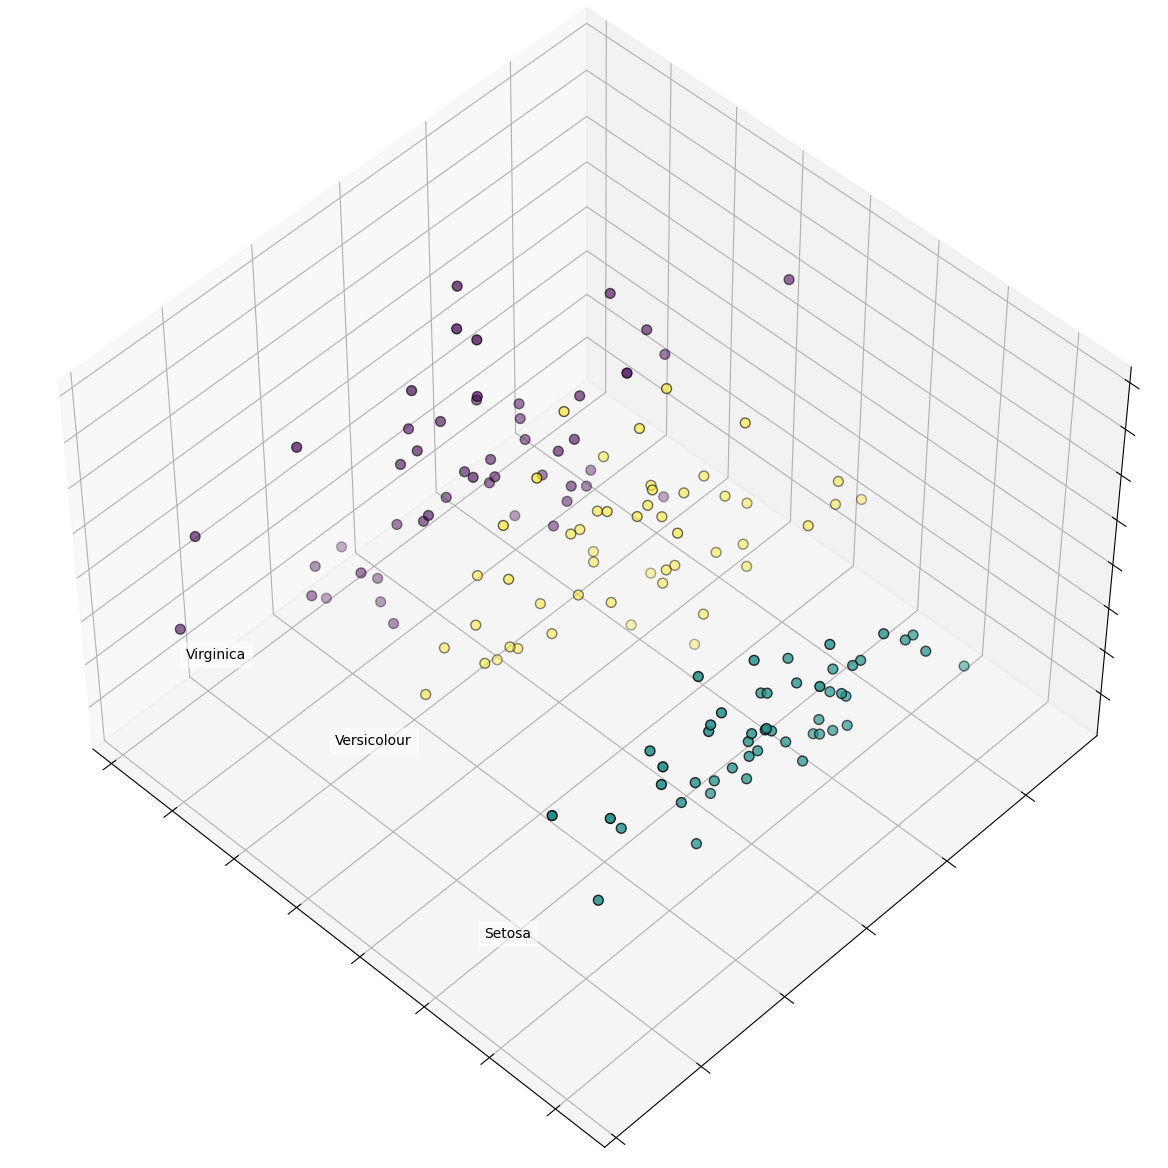

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

num_dim = 3

fig = plt.figure(1, figsize=(12, 12))
plt.clf()

if num_dim==3:
    ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134, auto_add_to_figure=False)
    fig.add_axes(ax)
else:
    ax = plt.subplot(1,1,1)
    fig.add_axes(ax)
    
plt.cla()
pca = decomposition.PCA(n_components=num_dim)
pca.fit(X)
X = pca.transform(X)

if num_dim==3:
    for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
        ax.text3D(
            X[y == label, 0].mean(),
            X[y == label, 1].mean() + 1.5,
            X[y == label, 2].mean(),
            name,
            horizontalalignment="center",
            bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
        )
# Reorder the labels to have colors matching the cluster results
if num_dim==3:
    y = np.choose(y, [1, 2, 0]).astype(float)

if num_dim==3:
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, s=50, edgecolor="k")
else:
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor="k")
    
if num_dim==3:
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

plt.show()

## 2D PCA Analysis

In [2]:
pca = decomposition.PCA(n_components=2)
X = iris.data
pca.fit(X)
X = pca.transform(X)

In [3]:
print(pca.components_)
print(pca.explained_variance_)
print(np.dot(pca.components_[0],pca.components_[1]))

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
[4.22824171 0.24267075]
3.885780586188048e-16


In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Radar chart visualization of Principal Components

[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]


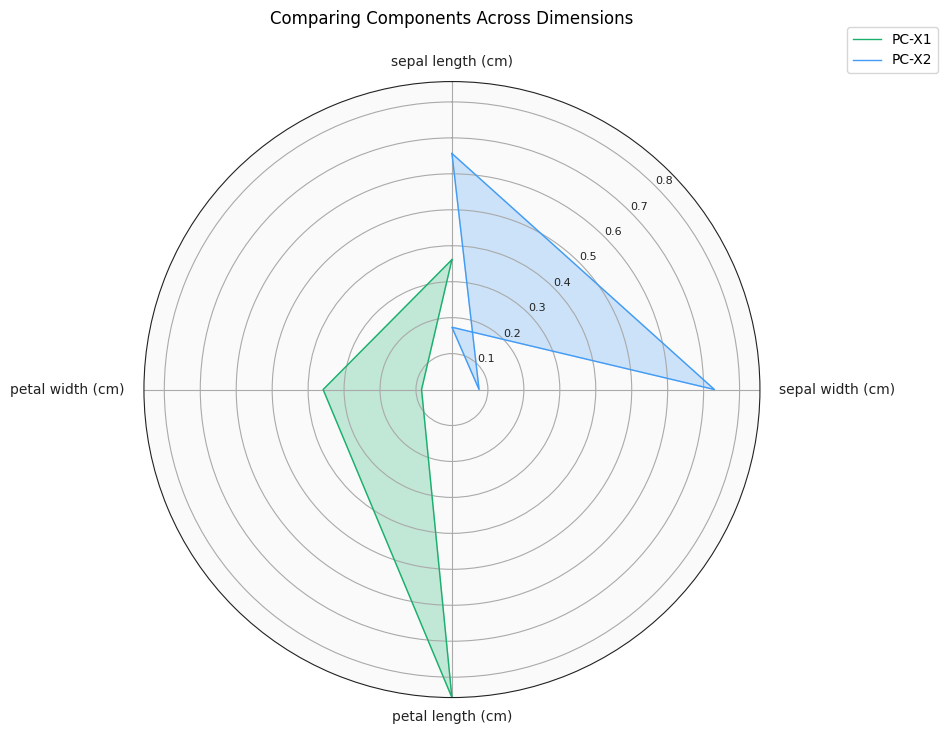

In [5]:
# Each attribute we'll plot in the radar chart.
labels = iris.feature_names

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]
print(angles)

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Helper function to plot each car on the radar chart.
def add_to_radar(vector, color, label):
    values = vector
    values = np.append(values, values[:1])
    theta = angles + (values<0)*np.pi
    values = np.abs(values)
    # plt.polar(theta+(r<0)*np.pi, np.abs(r))
    # ax.plot(angles, values, color=color, linewidth=1, label=label)
    # ax.fill(angles, values, color=color, alpha=0.25)
    ax.plot(theta, values, color=color, linewidth=1, label=label)
    ax.fill(theta, values, color=color, alpha=0.25)

# Add each car to the chart.
add_to_radar(pca.components_[0], '#1aaf6c', 'PC-X1')
add_to_radar(pca.components_[1], '#429bf4', 'PC-X2')

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles[:num_vars]), labels) 

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(0, np.max(np.abs(pca.components_)))
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Add title.
ax.set_title('Comparing Components Across Dimensions', y=1.08)

# Add a legend as well.
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

Mathematical note
Verify PCA as eigen vectors of the covariance matrix and eigen values as explained variance

In [6]:
import numpy as np
from scipy.stats.mstats import zscore
from sklearn.decomposition import PCA

def pca_code(data):
    #raw_implementation
    var_per=.98
    data -= np.mean(data, axis=0) # Axis 0 is the direction along the rows In a NumPy array, axis 0 is the “first” axis. 
    # data /= np.std(data, axis=0)
    """
    data /= np.std(data, axis=0)
    If we want to compute the eigenvectors of the correlation matrix, 
    that is the covariance matrix of the normalized variables.
    This is not part of the classic PCA, we will only center the variables. 
    The sklearn PCA does not feature scale the data beforehand.
    """
    cov_mat=np.cov(data, rowvar=False)
    print("Covariance matrix")
    print(cov_mat)
    eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)
    idx = np.argsort(eigen_vals)[::-1]
    eigen_vecs = eigen_vecs[:,idx]
    eigen_vals = eigen_vals[idx]
    variance_retained=np.cumsum(eigen_vals)/np.sum(eigen_vals)
    index=np.argmax(variance_retained>=var_per)
    eigen_vecs = eigen_vecs[:,:index+1]
    reduced_data=np.dot(eigen_vecs.T, data.T).T
    
    print("Eigen Values", eigen_vals)
    print("Eigen Vectors")
    print("-"*30)
    # print(eigen_vecs.T[1, :])
    print(eigen_vecs.T)
    print("-"*30)
    #using scipy package
    clf = PCA(var_per)
    X_train = data
    X_train = clf.fit_transform(X_train)
    print("sklearn.PCA")
    print('Explained Variance',clf.explained_variance_)
    print('Components')
    print("-"*30)
    # print(clf.components_[1,:])
    print(clf.components_)
    print("-"*30)

In [7]:
pca_code(iris.data)

Covariance matrix
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
Eigen Values [4.22824171 0.24267075 0.0782095  0.02383509]
Eigen Vectors
------------------------------
[[-0.36138659  0.08452251 -0.85667061 -0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [ 0.58202985 -0.59791083 -0.07623608 -0.54583143]]
------------------------------
sklearn.PCA
Explained Variance [4.22824171 0.24267075 0.0782095 ]
Components
------------------------------
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]
------------------------------


## Utility functions for visualization of feature vectors and confidence ellipses

In [8]:
def biplot(ax, data, reduced_data, pca):
    """
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data[:, 0], y=reduced_data[:, 1], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    """
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 1.25, 1.55,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, data.feature_names[i], color='black', ha='center', va='center', fontsize=14)

    ax.set_xlabel("Z1", fontsize=14)
    ax.set_ylabel("Z2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax  

In [9]:
from matplotlib.patches import Ellipse

def eigen_sorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]

def confidence_ellipse_plot(ax, reduced_data, nstd=2, edgecolor='black', facecolor='none', **kwargs):
    x = reduced_data[:,0]
    y = reduced_data[:,1]
    # nstd = 2
    # ax = plt.subplot(111)
    cov = np.cov(x, y)
    vals, vecs = eigen_sorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    w, h = 2 * nstd * np.sqrt(vals)
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                  width=w, height=h, angle=theta, 
                  alpha=0.7, zorder=0, linewidth=0.2,
                  edgecolor=edgecolor, facecolor=facecolor, **kwargs)
    ax.add_artist(ell)
    # plt.scatter(x, y)
    # plt.show()

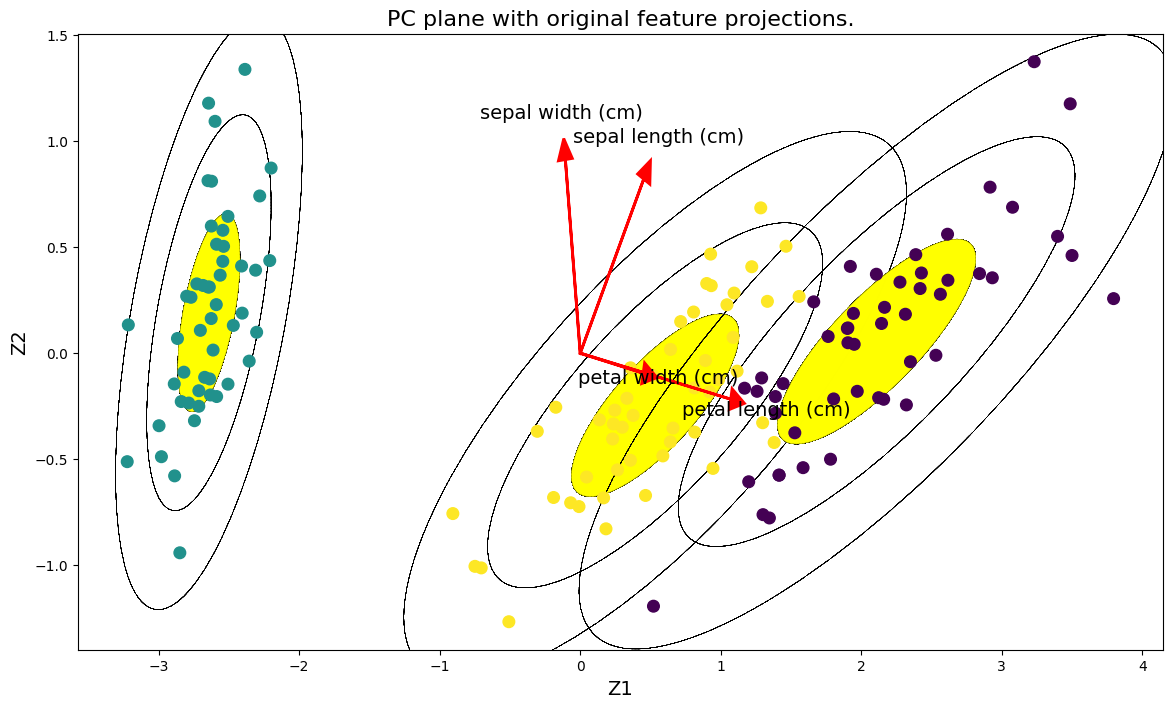

In [10]:
fig, ax = plt.subplots(figsize = (14,8))
# scatterplot of the reduced data    
ax.scatter(x=X[:, 0], y=X[:, 1], 
           # facecolors=y, edgecolors='b', alpha=0.5,
           c=y,
           s=70)
biplot(ax, iris, X, pca)
for target in iris.target:
    for nstd in range(1,4):
        confidence_ellipse_plot(ax,X[np.argwhere(iris.target==target).ravel()], nstd=nstd, 
                                facecolor='yellow' if nstd==1 else 'none', linestyle='--')
plt.show()